# Introduction
In this project, we develop predictive regression models utilising multiple linear regression and random forest algorithms. These tasks can be accomplished through data preprocessing, model training, and model evaluation. In this project, we utilise the technique of holds out to divide the datasets into separate sets for the purpose of training and testing, to evaluate their performance. In addition, we utilise grid search to optimise the hyperparameters of random search trees. Next, we employ evaluation metrics such as the R² score, mean squared error, and mean absolute error to assess the performance of the predictive models. Ultimately, we conduct a comparison between the two models to determine the model that exhibits better performance.


In [1]:
#import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preprocessing

Firstly, we read the data from the downloaded file and identify the number of columns and rows of the datasets. Then, we visualise the first 5 rows of the dataset. 

In [2]:
# Gather Datasets and read the data from the file 
data = pd.read_csv('C:/Users/USER/year2sem1project/AML/DATA SETS/listings.csv/listings.csv')  # put in the same directory

# Identify the num of rows and columns that we have in the datasets
for data in [data]:
    print(data.shape)

(3585, 95)


In [3]:
# Visualise the first 5 rows of the dataset
for data in [data]:
    display(data.head(5))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Subsequently, it is necessary to acquire comprehensive information regarding the dataset by employing the data.info() function. In advance of fitting the data into the model, it is crucial to verify the dataset's information for data cleaning and data preprocessing.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

It is obvious that there are 4 columns with null variables for all entries. Since the null columns bring no information for model training, we can remove those columns. 

In [5]:
data = data.dropna(axis=1, how='all')

In [6]:
data.shape

(3585, 91)

In [7]:
print(data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
      

Next, we generate a heatmap to visually represent the correlation coefficients among attributes. The shades of heatmap colours allow for a more efficient identification of the attributes that are more closely correlated with each other. A correlation coefficient of 1 indicates a perfectly positive linear relationship. As one variable increases, the other variable exhibits a direct and proportional increase. This aids in the selection of attributes that may be more relevant or have a greater impact on predicting the target variable.


<AxesSubplot:>

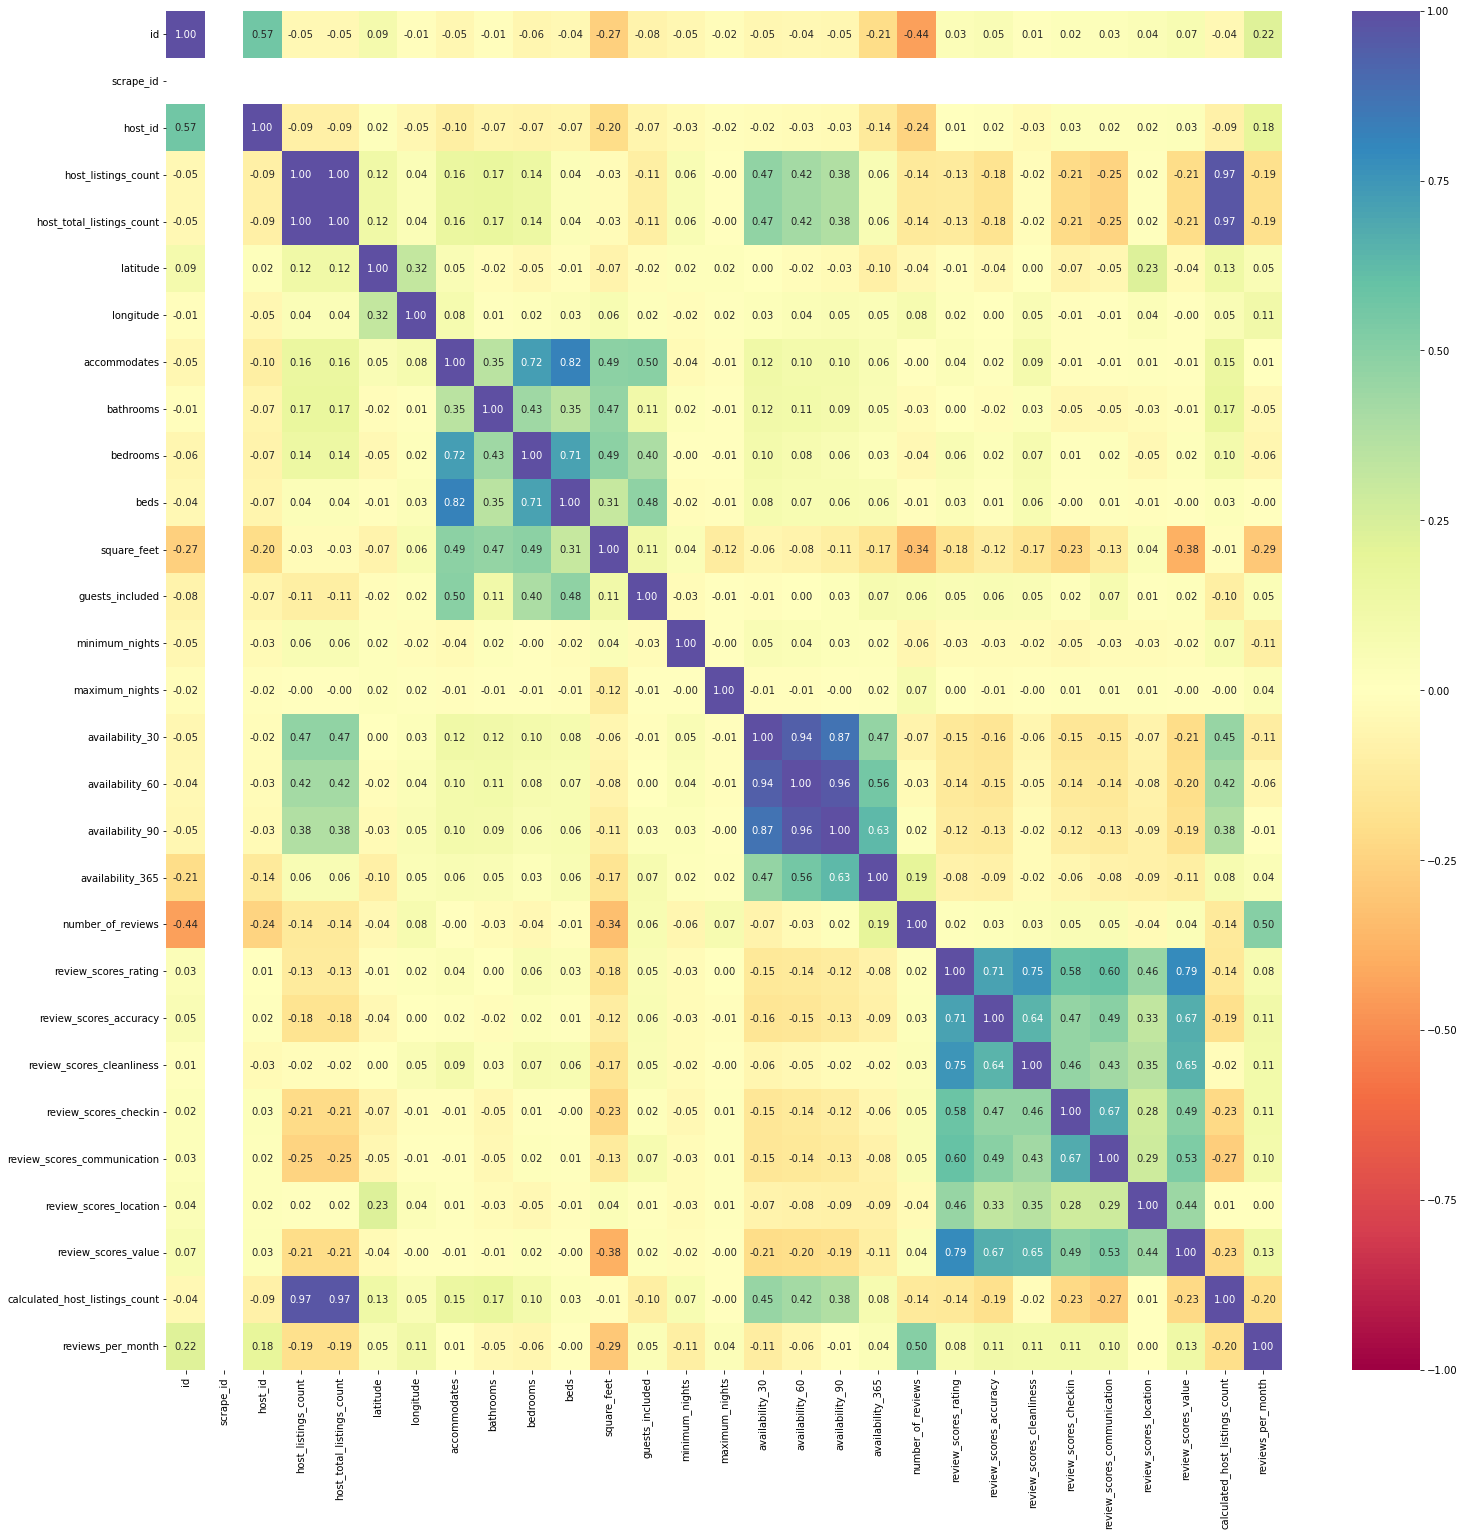

In [9]:
#to further choose what attributes to fit in the model we use heatmap 
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral', fmt='.2f', ax=ax)

As we are doing regression problem, we would choose the attributes that are highly correlated to the target variables.

In [10]:
columns_to_keep = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                   'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value']
data = data[columns_to_keep]

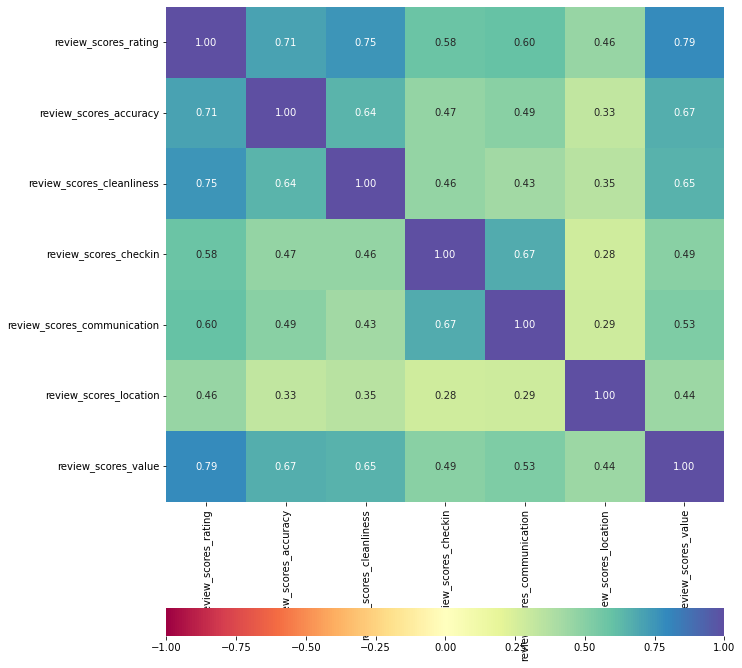

In [11]:
fig, ax = plt.subplots(figsize=(10, 13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral', fmt='.2f', ax=ax, cbar_kws={"orientation": "horizontal"})
plt.show()

In [12]:
data.shape

(3585, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         2772 non-null   float64
 1   review_scores_accuracy       2762 non-null   float64
 2   review_scores_cleanliness    2767 non-null   float64
 3   review_scores_checkin        2765 non-null   float64
 4   review_scores_communication  2767 non-null   float64
 5   review_scores_location       2763 non-null   float64
 6   review_scores_value          2764 non-null   float64
dtypes: float64(7)
memory usage: 196.2 KB


We use boxplot to visualize the variability of the data in the dataset. Boxplot provides a quick summary of that whereby it indicates the dataset's median, upper and lower quartiles, lowest and maximum values, and any outliers. 

[Text(0.5, 1.0, 'Review Scores Value')]

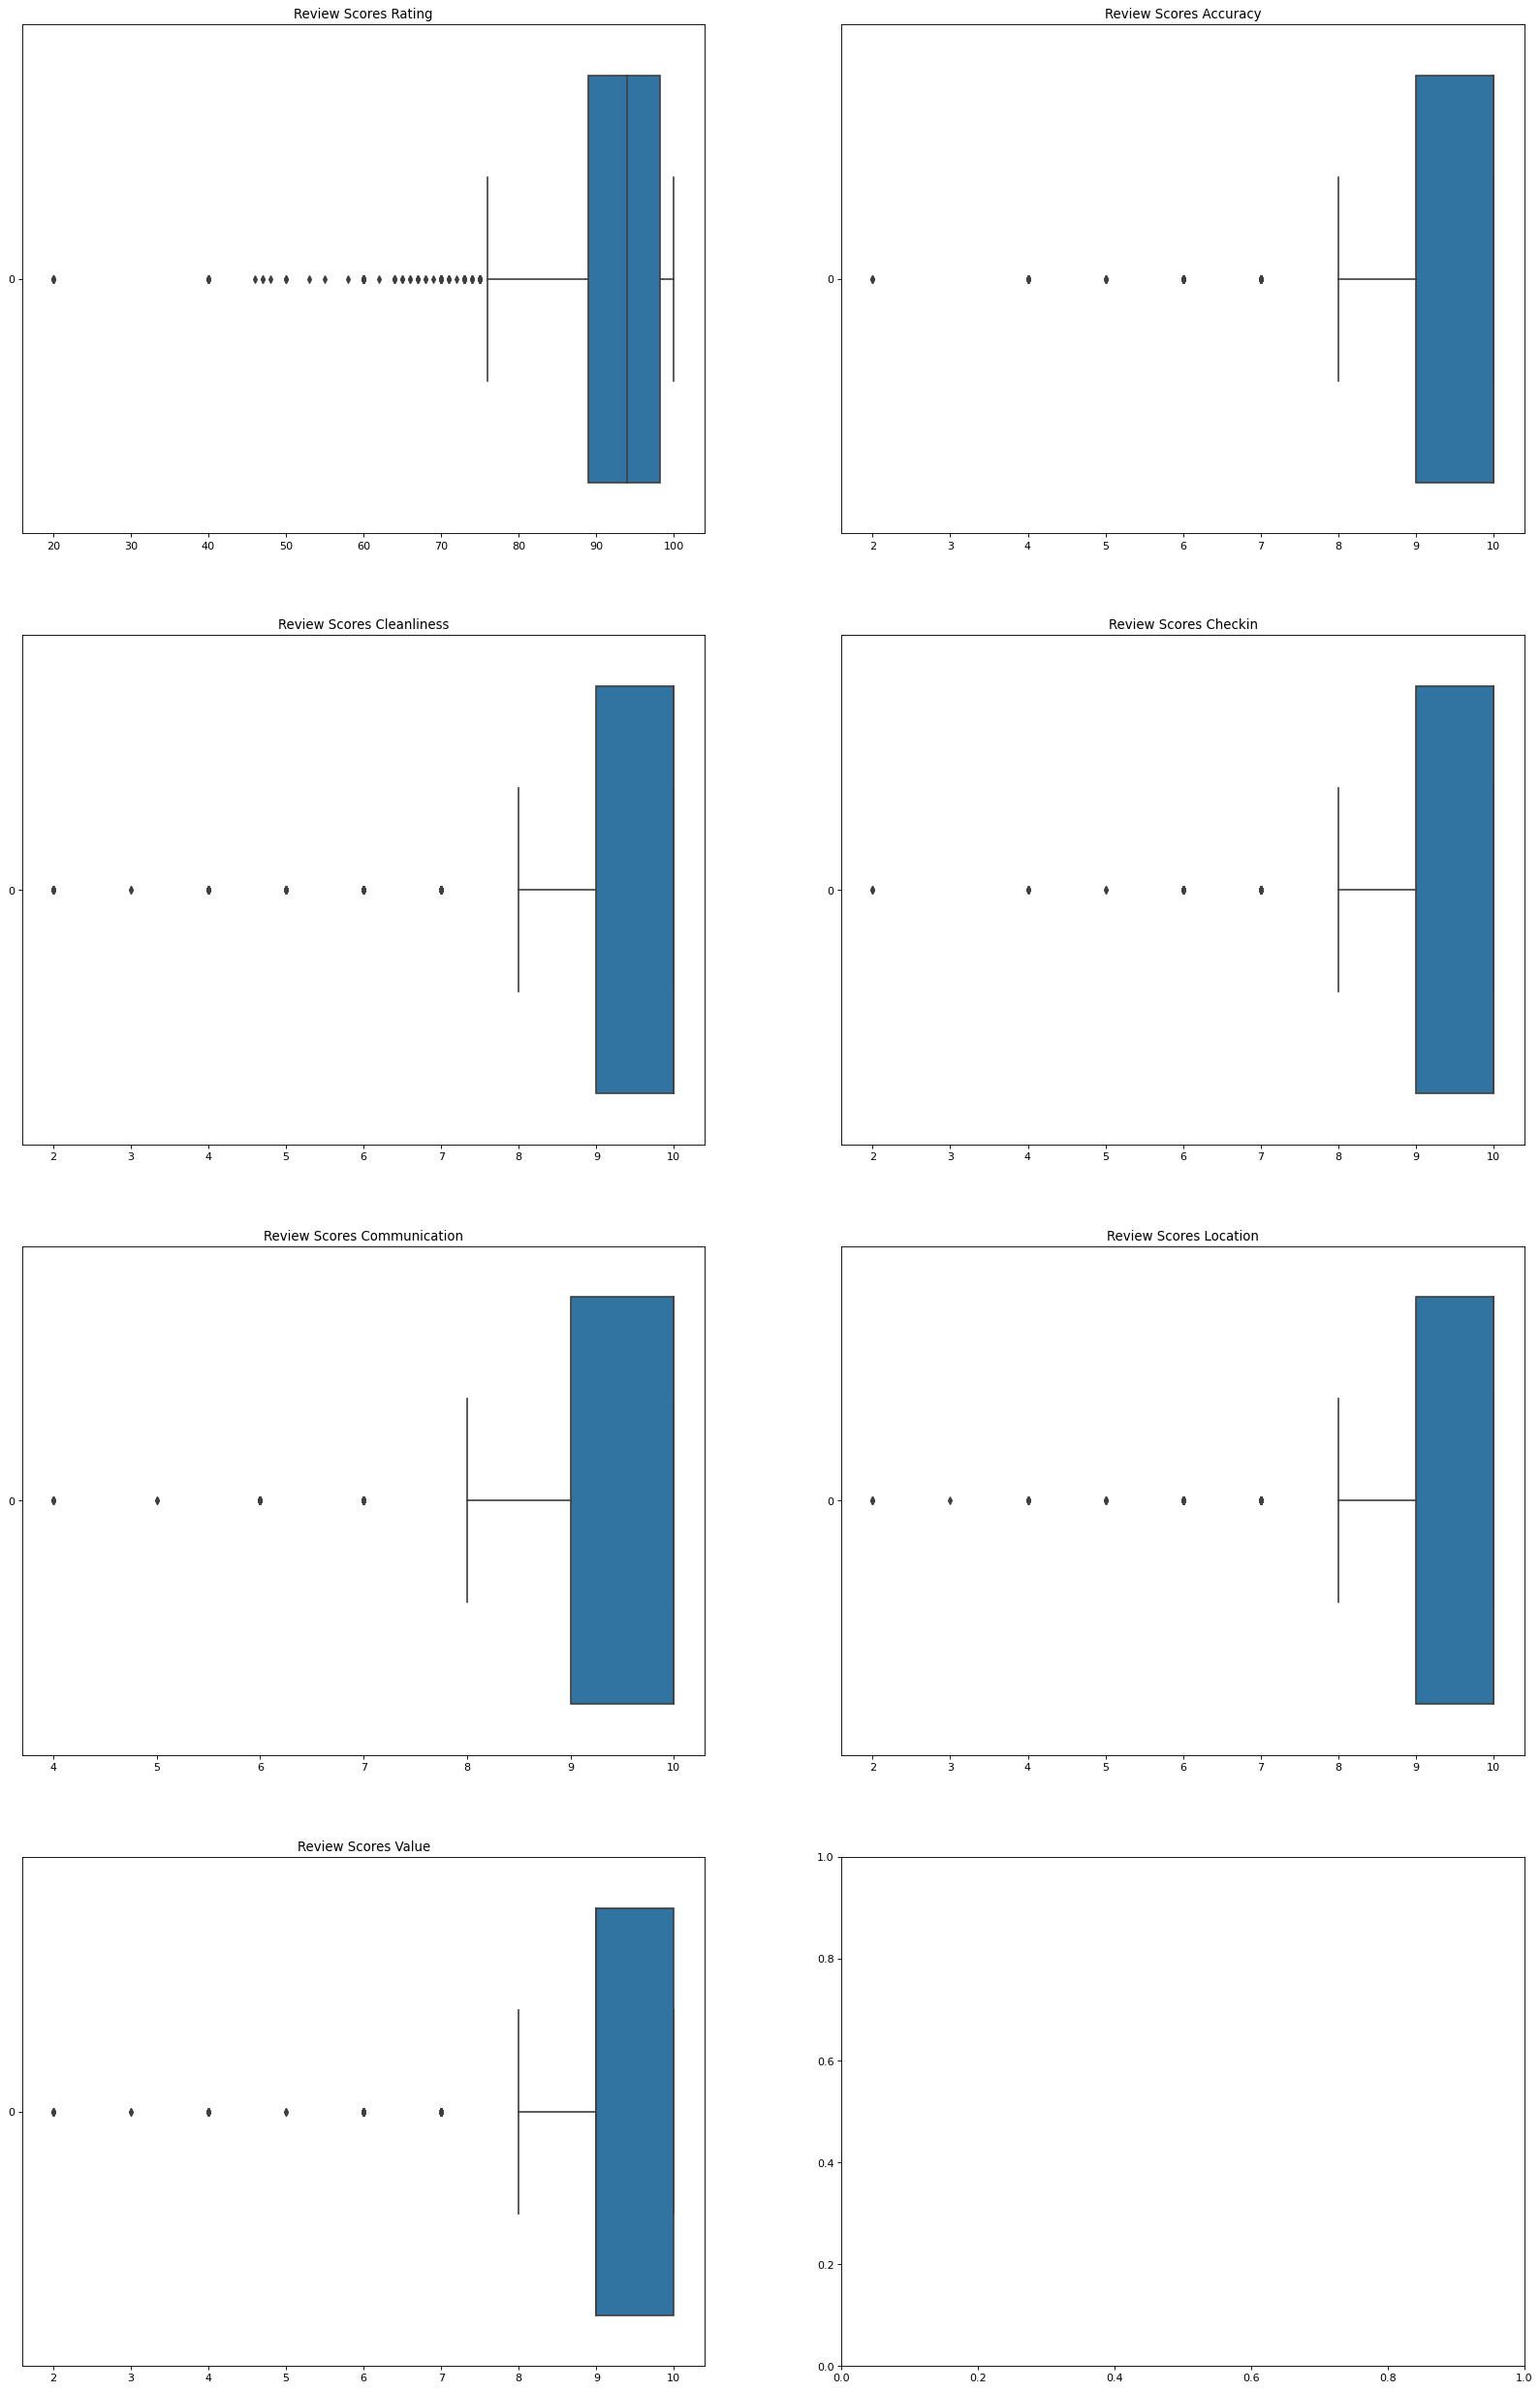

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(25, 40), dpi=80)

sns.boxplot(data=data["review_scores_rating"], orient = "h", ax=axs[0, 0]).set(title="Review Scores Rating")
sns.boxplot(data=data["review_scores_accuracy"], orient = "h", ax=axs[0, 1]).set(title="Review Scores Accuracy")
sns.boxplot(data=data["review_scores_cleanliness"], orient = "h", ax=axs[1, 0]).set(title="Review Scores Cleanliness")
sns.boxplot(data=data["review_scores_checkin"], orient = "h", ax=axs[1, 1]).set(title="Review Scores Checkin")
sns.boxplot(data=data["review_scores_communication"], orient = "h", ax=axs[2, 0]).set(title="Review Scores Communication")
sns.boxplot(data=data["review_scores_location"], orient = "h", ax=axs[2, 1]).set(title="Review Scores Location")
sns.boxplot(data=data["review_scores_value"], orient = "h", ax=axs[3, 0]).set(title="Review Scores Value")

From the boxplot, we can see that there are some outliers in our data. The presence of outliers may cause bias in machine learning. However, as we observe from the boxplot, the outliers in the target variable depend on the values of the independent variable which means there exists relationship between the outliers. Also, we know that the presence of outliers is because there are only a few users rated low scores. In this case, the outliers are important for us to predict the review rating with lower scores. Therefore, we need to include the outliers in our training process.  

# Data Cleaning

The next step we need to do is fill in the missing value because we want to do the multiple linear regression and random forest model. These models typically require complete datasets without missing values. Filling in missing data is necessary to ensure the models can be trained effectively and provide accurate predictions. We fill the missing values with the median because it is less sensitive to extreme values (outliers) compared to the mean. Using the median for imputation helps maintain the overall characteristics of the original data distribution and reduces the impact of outliers on the imputed values. Then, we will check again the data information to ensure all attributes have complete data. 

In [15]:
attributes = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
              'review_scores_checkin', 'review_scores_communication',
              'review_scores_location', 'review_scores_value']

for attribute in attributes:
    data[attribute].fillna(data[attribute].median(), inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         3585 non-null   float64
 1   review_scores_accuracy       3585 non-null   float64
 2   review_scores_cleanliness    3585 non-null   float64
 3   review_scores_checkin        3585 non-null   float64
 4   review_scores_communication  3585 non-null   float64
 5   review_scores_location       3585 non-null   float64
 6   review_scores_value          3585 non-null   float64
dtypes: float64(7)
memory usage: 196.2 KB


Then we use the histplot to visualize the distribution of the review dataset to understand how skewed it is. Understanding how the data is skewed can influence the performance of a machine learning model and the skewed data can lead to biased model predictions. It will cause our model to imbalance, so we want to solve this problem to ensure fair and accurate results. 

<AxesSubplot:xlabel='review_scores_value', ylabel='Count'>

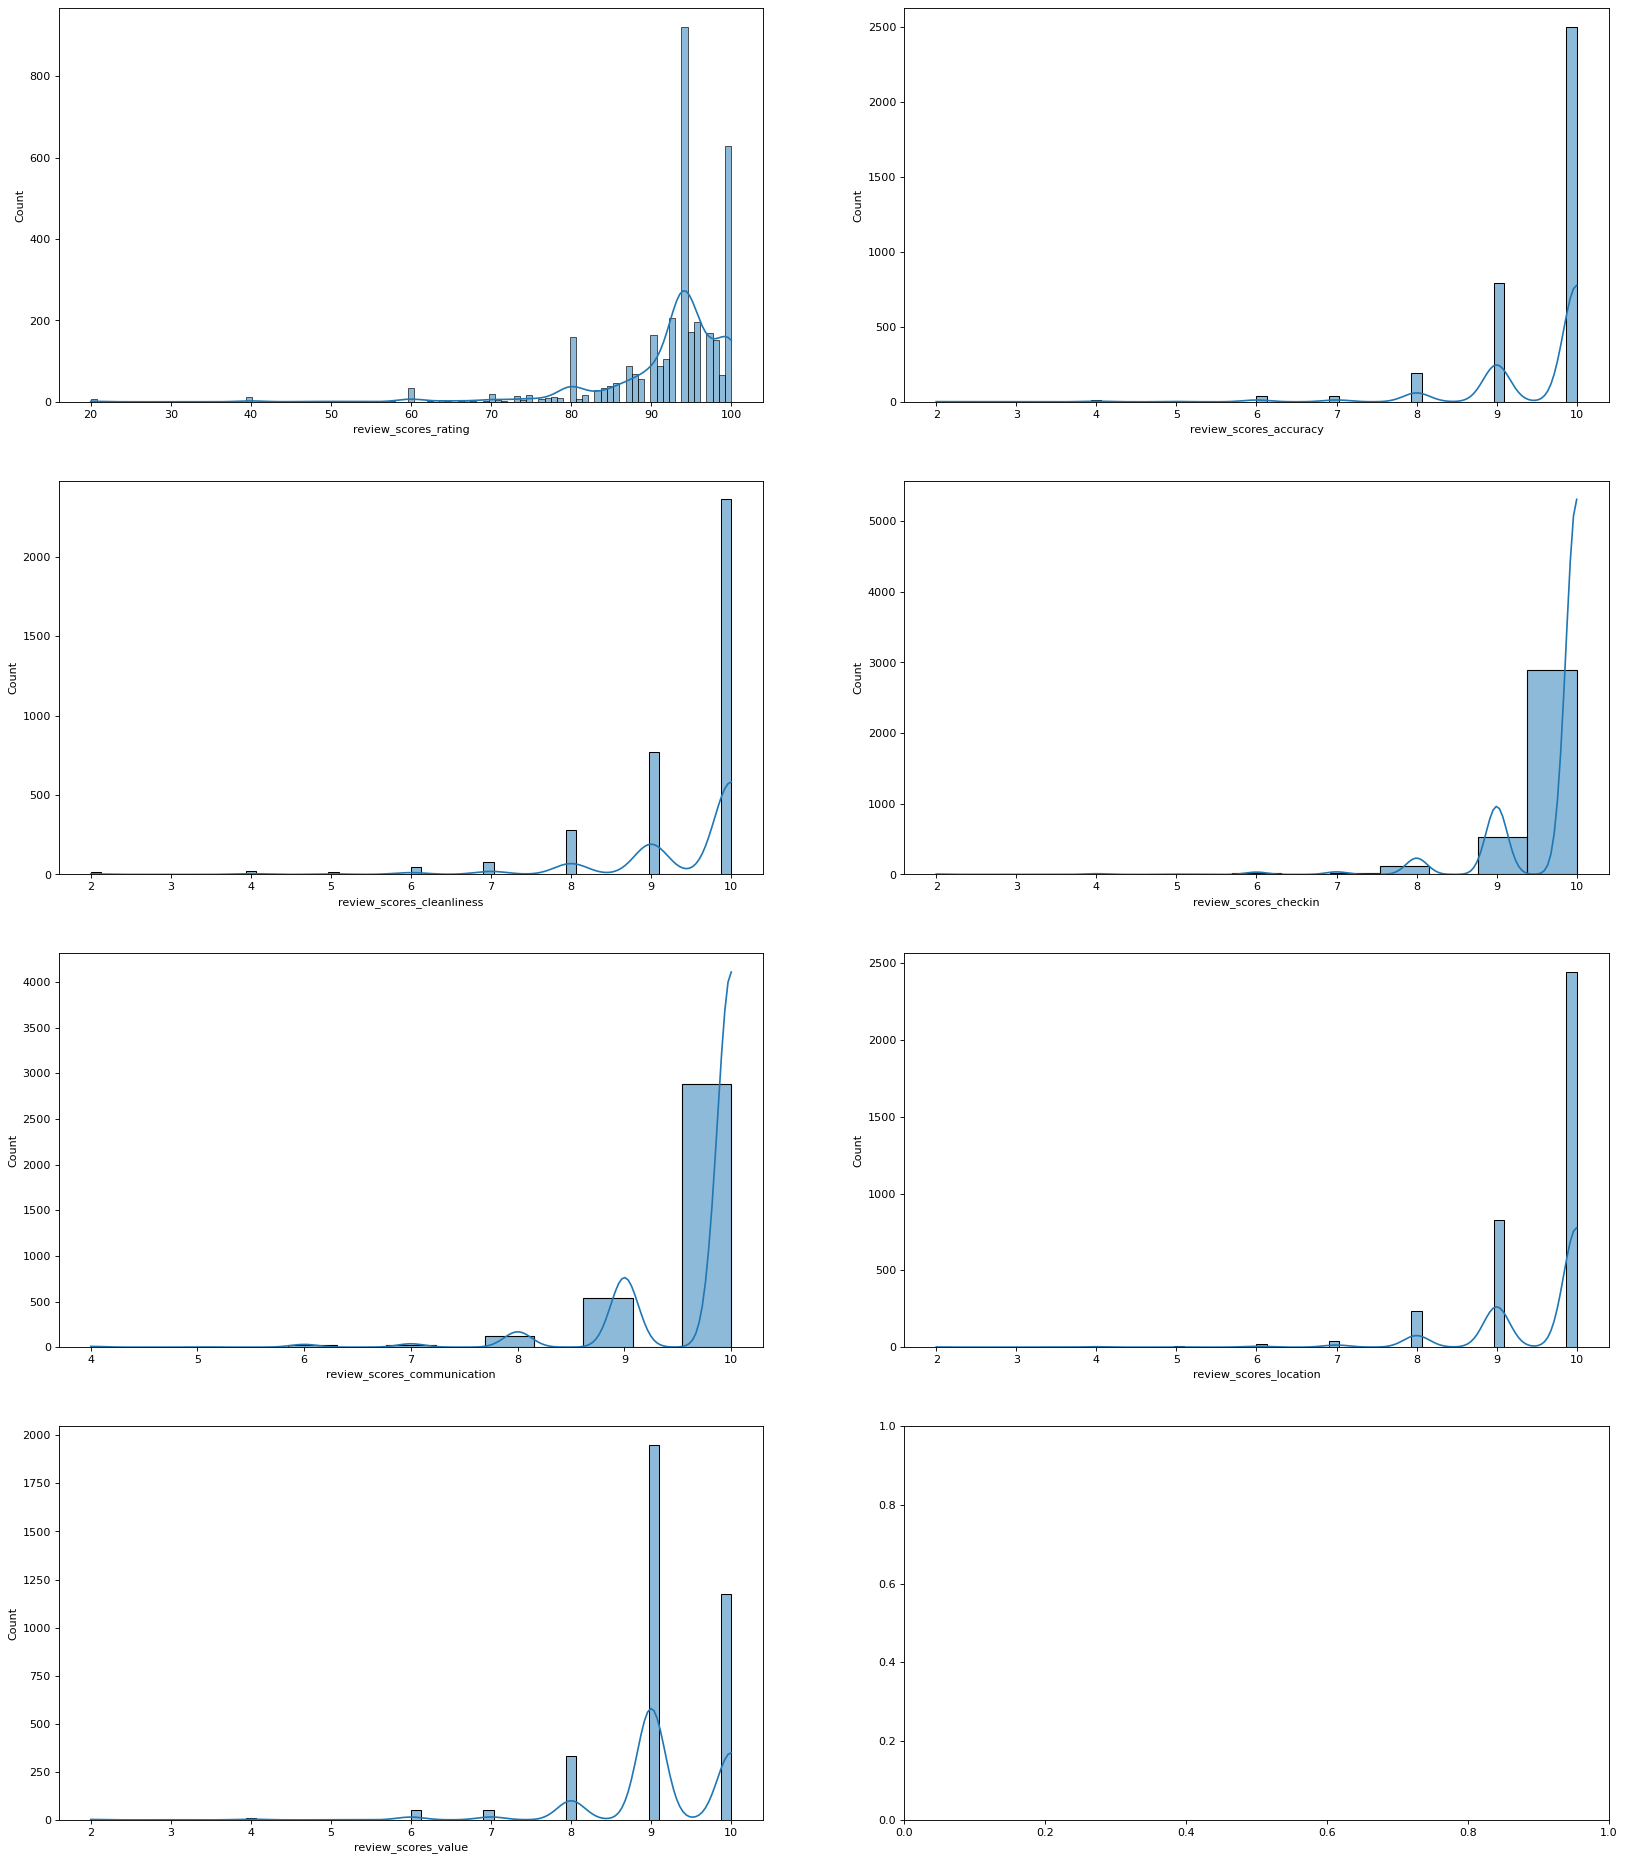

In [17]:
#Visualize the distribution of review data to understand how skewed it is
fig, axs = plt.subplots(4, 2, figsize=(25, 30), dpi=80)

sns.histplot(data["review_scores_rating"], kde=True , ax=axs[0, 0])
sns.histplot(data["review_scores_accuracy"], kde=True, ax=axs[0, 1])
sns.histplot(data["review_scores_cleanliness"], kde=True, ax=axs[1, 0])
sns.histplot(data["review_scores_checkin"], kde=True, ax=axs[1, 1])
sns.histplot(data["review_scores_communication"], kde=True, ax=axs[2, 0])
sns.histplot(data["review_scores_location"], kde=True, ax=axs[2, 1])
sns.histplot(data["review_scores_value"], kde=True, ax=axs[3, 0])
#visualize the distribution of the review dataset to understand how skewed it is. 
#Understanding how the data is skewing can influence the performance of a machine-learning model.
#Skewed data can lead to biased model predictions.

From the review score rating attribute, we know that our data range is from 0 to 100 and it is obvious that the data is skewed to the value of the last column, so it is a negative skew data distribution. 

Therefore, we need to normalize the data. Normalization ensures that all features contribute equally to the distance metrics used in algorithms. Without normalization, features with larger scales could dominate the calculations. Also, normalizing data can influence the performance of the optimization process, which, in turn, affects how well the model minimizes the MSE (Mean Squared Error) during training. Minimizing MSE provides a clear and quantifiable objective for the learning algorithm to optimize. These are the normalized data of review scores rating and we can notice that their current data range is minor compared to the previous range of 0-100. 

In [18]:
 #Normalize all values using StandardScaler
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=columns_to_keep)

In [19]:
data_normalized.info
#These are the data after doing the normalization. 
#We can notice that their current data range is minor compared to the previous range of 0-100. 

<bound method DataFrame.info of       review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 0.191196                0.514002                   0.533716   
1                 0.191196                0.514002                  -0.398272   
2                 0.665958                0.514002                  -0.398272   
3                 0.903339                0.514002                   0.533716   
4                 0.784648                0.514002                   0.533716   
...                    ...                     ...                        ...   
3580             -0.283566                0.514002                   0.533716   
3581              0.191196                0.514002                   0.533716   
3582              0.191196                0.514002                   0.533716   
3583             -0.283566               -0.659690                  -1.330261   
3584              0.191196                0.514002                   0.533716

# Model Training 
### Multiple Linear Regression

A regression is a statistical technique that relates a dependent variable to one or more independent (target) variables. A regression model is able to show whether changes observed in the dependent variable are associated with changes in one or more of the explanatory variables. 

Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values when there is only 1 attribute and 1 target variables. 
Multiple linear regression extends to multiple variables and utilizes a hyperplane to model the relationship between the variables.

The hyperplane is set as a predictable value which is represented by this regression line but doesn’t hit all the actual valve data points as they are scattered the line is tries to be as close as possible to all of our data points. 

Mean Squared Error: 0.22762640327797223
R-squared: 0.7814179140040374


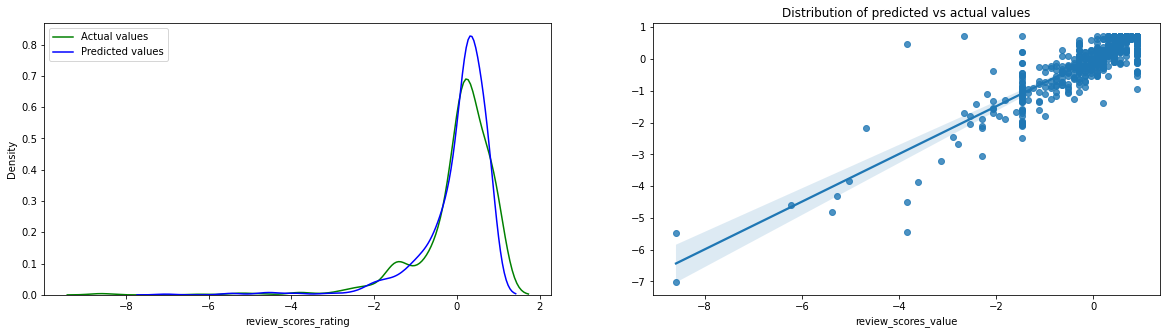

In [20]:
#Assign target y variable and features X variable

y = data_normalized['review_scores_rating'] 

X = data_normalized.drop(labels = ['review_scores_rating'], axis = 1)

#split test and train dataset from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sns.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('review_scores_value');

Multiple Linear regression fits a hyperplane that minimizes the discrepancies between predicted and actual output values.

So, looking at the curve of the actual values and the predicted values, they both produce a similar shapes of curve except that the predicted values is slighty higher. 

After that, it's essential to evaluate the performance of a multiple linear regression model using metrics such as mean squared error (MSE) or R-squared, and to consider potential sources of discrepancy between actual and predicted values.  The MSE measures the average squared difference between the predicted values and the actual values. It is calculated as the sum of the squared differences divided by the number of observations. A lower MSE indicates better model performance.In our model the mse is 0.22762640327797223.The R-squared value is 0.7814, which means that approximately 78.14% of the variance in the dependent variable is explained by the independent variables in our model.  

### Random Forest Regression

Random forest regression is a machine-learning that uses ensemble technique. It uses a combination of multiple decision trees instead of depending on one to determine the final output. Random forest can prevent overfitting as it has a lower variance, which allows it to have better generalisation as compared to decision tree. 


Random Forest Mean Squared Error: 0.2688132194954476
Random Forest R-squared: 0.7418675803226049


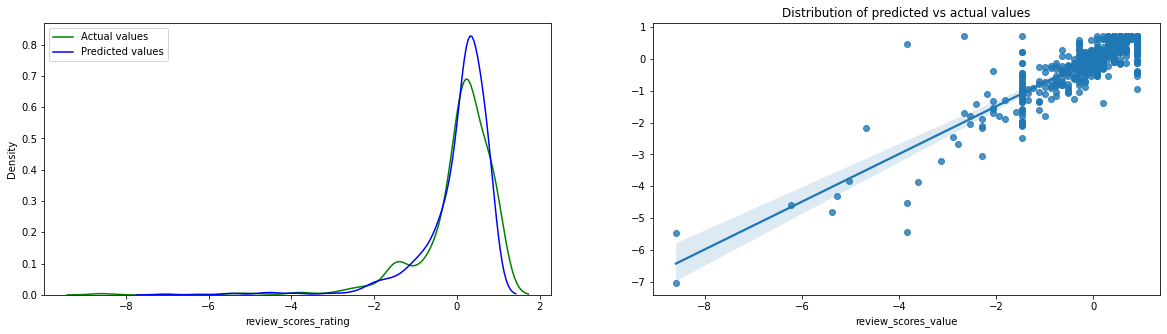

In [21]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sns.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('review_scores_value');

As observed, random forest model mse is slightly higher. 

Therefore, it is important to do hyperparameter tuning to improve the performance of the random forest model.

Hyperparameter tuning is the process of choosing the best values for a machine learning model’s hyperparameter. It aims to identify the best values to achieve optimal performance on a specific task. There are a few hyperparameter in random forest regression model including max_depth, min_sample_split, max_leaf_nodes, min_samples_leaf, n_estimators, max_sample, max_features and criterion. 

- Max_depth is the maximum depth of the tree. 

- Min_sample_split is the minimum number of samples required to split an internal node. 

- Min_samples_leaf is the minimum number of samples required to be at a leaf node. 

- N_estimators is the number of trees in the random forest model. 

- Max_feature is the number of features to consider when looking for the best split. 

In this case, we tune four of the hyperparameters which are n_estimators, max_depth, min_samples_split, min_samples_leaf. This can be done by using the grid search method. The parameter grid is defined by including a set of possible hyperparameter values that we can use to construct the model. The grid search technique organises the predefined hyperparameter into a matrix-like structure.  The model is then trained using all possible combinations of the hyperparameter values. After that, the hyperparameter of the model with best performance is chosen as best hyperparameter. We then use the best hyperparameter chosen to train the model again.

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}

Tuned Random Forest Mean Squared Error: 0.24383405100919286
Tuned Random Forest R-squared : 0.765854247403148


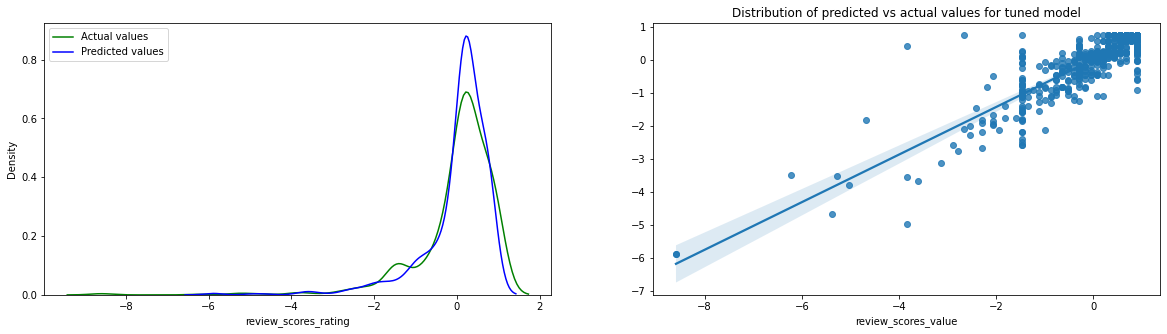

In [22]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 8, 10],
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best parameters to create the final model
best_rf_model = RandomForestRegressor(random_state=0, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nTuned Random Forest Mean Squared Error:", mse_rf_tuned)
print("Tuned Random Forest R-squared :", r2_rf_tuned)

# Plot the distribution of predicted vs actual values for the tuned model
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sns.kdeplot(data=y_pred_rf_tuned, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred_rf_tuned)
plt.title('Distribution of predicted vs actual values for tuned model')
plt.xlabel('review_scores_value');

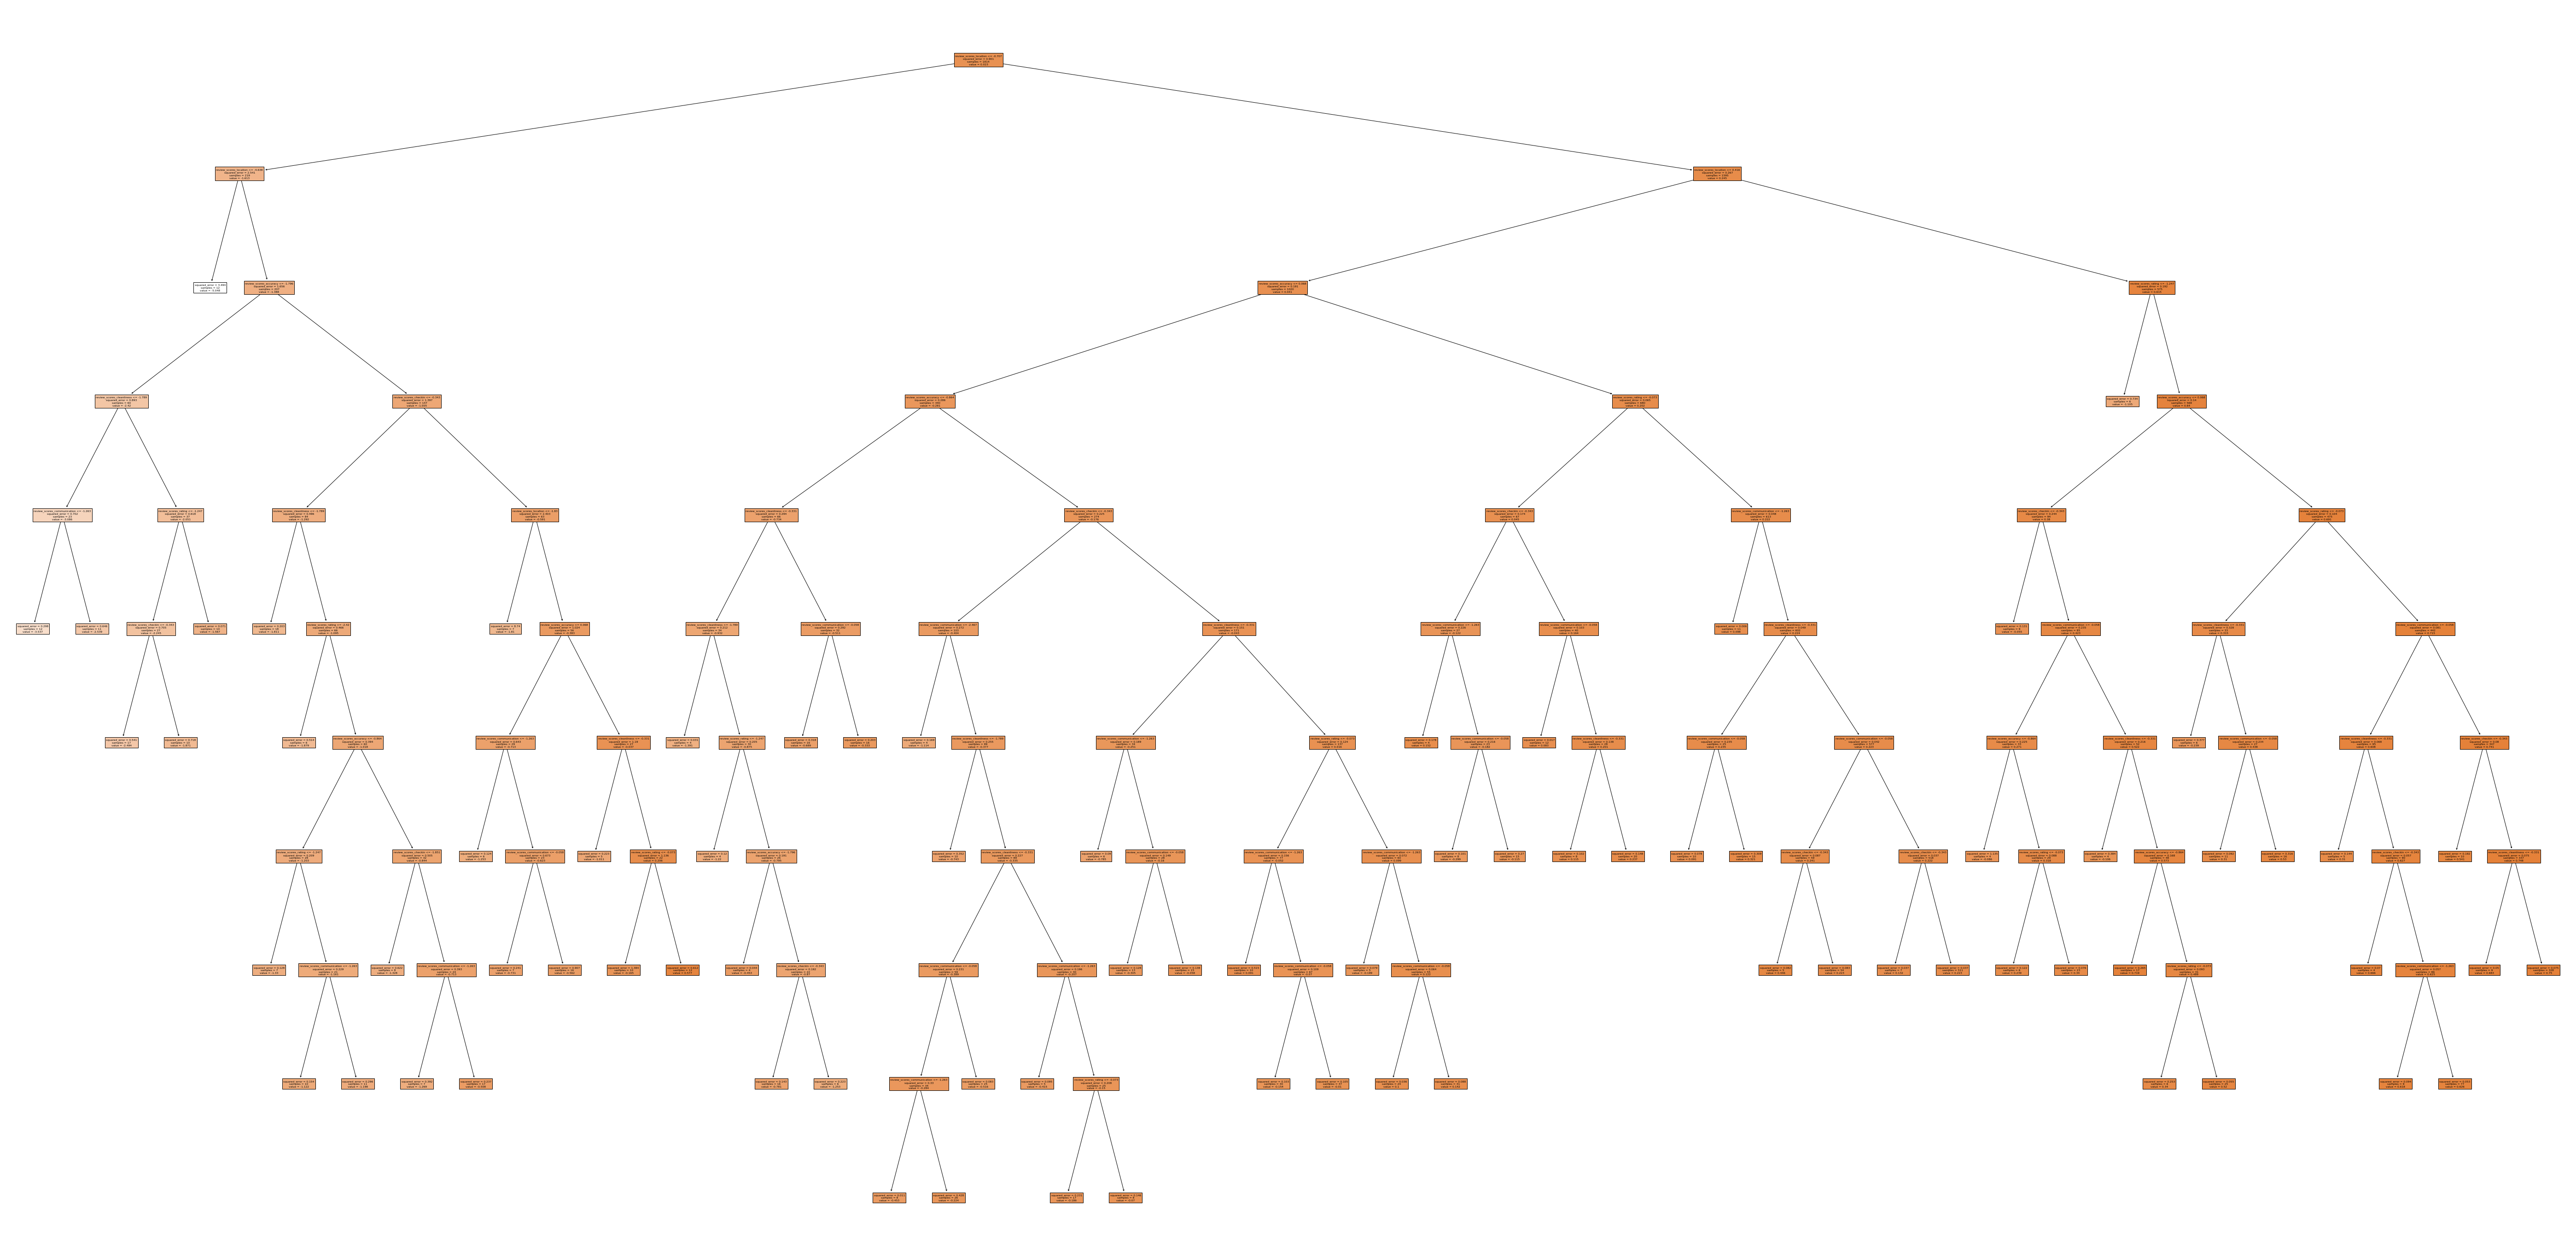

In [23]:
# Visualize an individual decision tree from the Random Forest
from sklearn import tree
from sklearn.tree import plot_tree

feature_names = data.columns

plt.figure(figsize=(100, 50))
tree.plot_tree(best_rf_model.estimators_[0], feature_names = feature_names, filled = True)
plt.show()

# Conclusion

Both model cannot 100 % accurately predict the review score rating.One of the reason lying behing might be the presence of random noise as there are numbers of missing values in the column. 

However within an acceptable accuray range, Multiple Linear regression model do a better job as compared to the random forest model. 

The reasons behind this conclusion: 

The relationship between target and feature is clean, simple and easy to understand.
Multiple linear regression model can perform better than a random forest in this case.
  
The Multiple linear regression model has few parameters, while the random forest has a lot.So the random forest generally overfit more easily than a multiple linear regression.If the relationship between the independent variables and the target variable is predominantly linear, a multiple linear regression model would naturally perform better.

On the other hand, Random forests have a higher capacity for capturing complex patterns.If the dataset contains a mix of categorical and continuous variables, random forests can often handle this mix better.   
